In [110]:
import tensorflow as tf 
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [33]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCH=30

In [3]:
train=tf.keras.preprocessing.image_dataset_from_directory(
    "Train",shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)
test=tf.keras.preprocessing.image_dataset_from_directory(
    "Test",shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)
valid=tf.keras.preprocessing.image_dataset_from_directory(
    "Valid",shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)


Found 900 files belonging to 3 classes.
Found 306 files belonging to 3 classes.
Found 300 files belonging to 3 classes.


In [4]:
classnames=train.class_names
classnames

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(train)

29

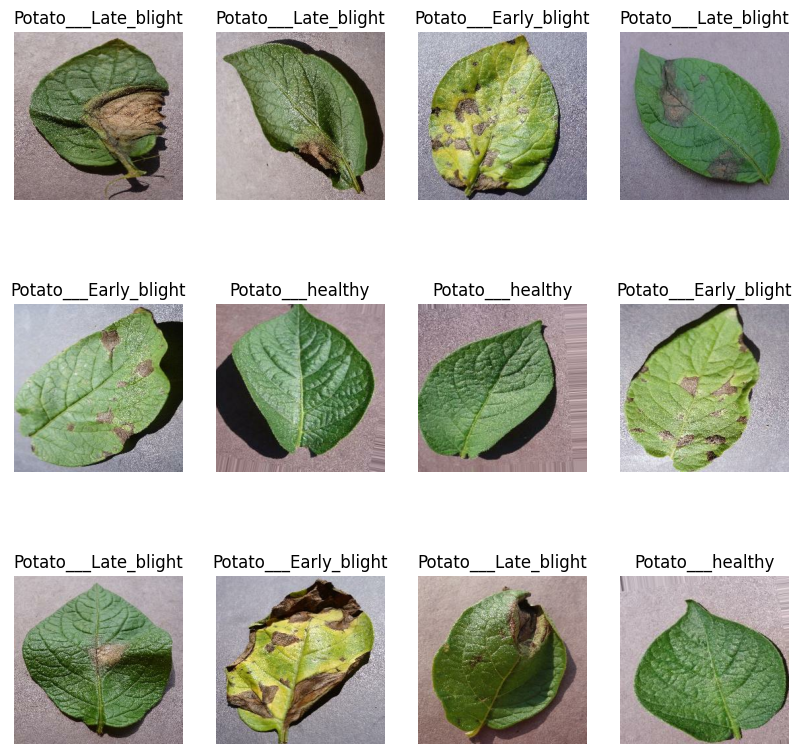

In [32]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in train.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(classnames[label_batch[i]])
        plt.axis("off")
    

In [74]:
train_ds=train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [75]:
test_ds=test.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [76]:
valid_ds=valid.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [77]:
resize_and_rescale=tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    tf.keras.layers.Rescaling(1.0/255)
])

In [78]:
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
])

In [79]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3

model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])
model.build(input_shape=input_shape)

In [80]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_8 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_9 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy']
             )

In [85]:
model.fit(train_ds,epochs=30,batch_size=BATCH_SIZE,verbose=1,validation_data=valid_ds)

Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 28s 985ms/step - accuracy: 0.9957 - loss: 0.0061 - val_accuracy: 0.9633 - val_loss: 0.0789
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 27s 943ms/step - accuracy: 0.9991 - loss: 0.0033 - val_accuracy: 0.9200 - val_loss: 0.2827
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 912ms/step - accuracy: 0.9971 - loss: 0.0078 - val_accuracy: 0.9600 - val_loss: 0.1467
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.9964 - loss: 0.0076 - val_accuracy: 0.9533 - val_loss: 0.1785
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9966 - loss: 0.0059 - val_accuracy: 0.9533 - val_loss: 0.1509
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9992 - loss: 0.0059 - val_accuracy: 0.9667 - val_loss: 0.1420
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.9948 - loss: 0.0243 - val_accuracy: 0.9300 - val_loss: 0.2198
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.9813 - loss: 0.0735 - val_accuracy: 0.9867 - 

In [86]:
scores=model.evaluate(test_ds)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step - accuracy: 0.9752 - loss: 0.0890


In [90]:
history=model.fit(train_ds,epochs=1,batch_size=BATCH_SIZE,verbose=1,validation_data=valid_ds)

29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 689ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9833 - val_loss: 0.0443


In [92]:
scores=model.evaluate(test_ds)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step - accuracy: 0.9808 - loss: 0.0514


In [93]:
history.params

{'verbose': 1, 'epochs': 1, 'steps': 29}

In [94]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

first image to predict
first image's actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
Potato___Late_blight


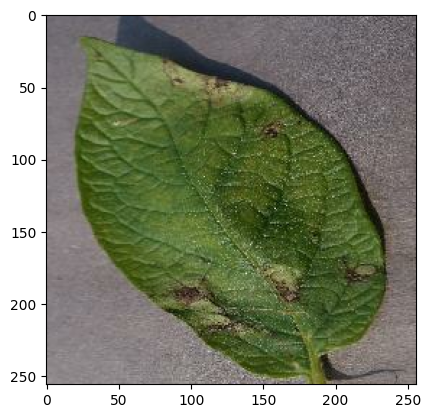

In [115]:
for images_batch,labels_batch in test_ds.take(1):
    
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0].numpy()
    print('first image to predict')
    plt.imshow(first_image)
    print("first image's actual label:",classnames[first_label])
    batch_prediction=model.predict(images_batch)
    print(classnames[np.argmax(batch_prediction[0])])

In [116]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)
    predictions=model.predict(img_array)
    predicted_class=classnames[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


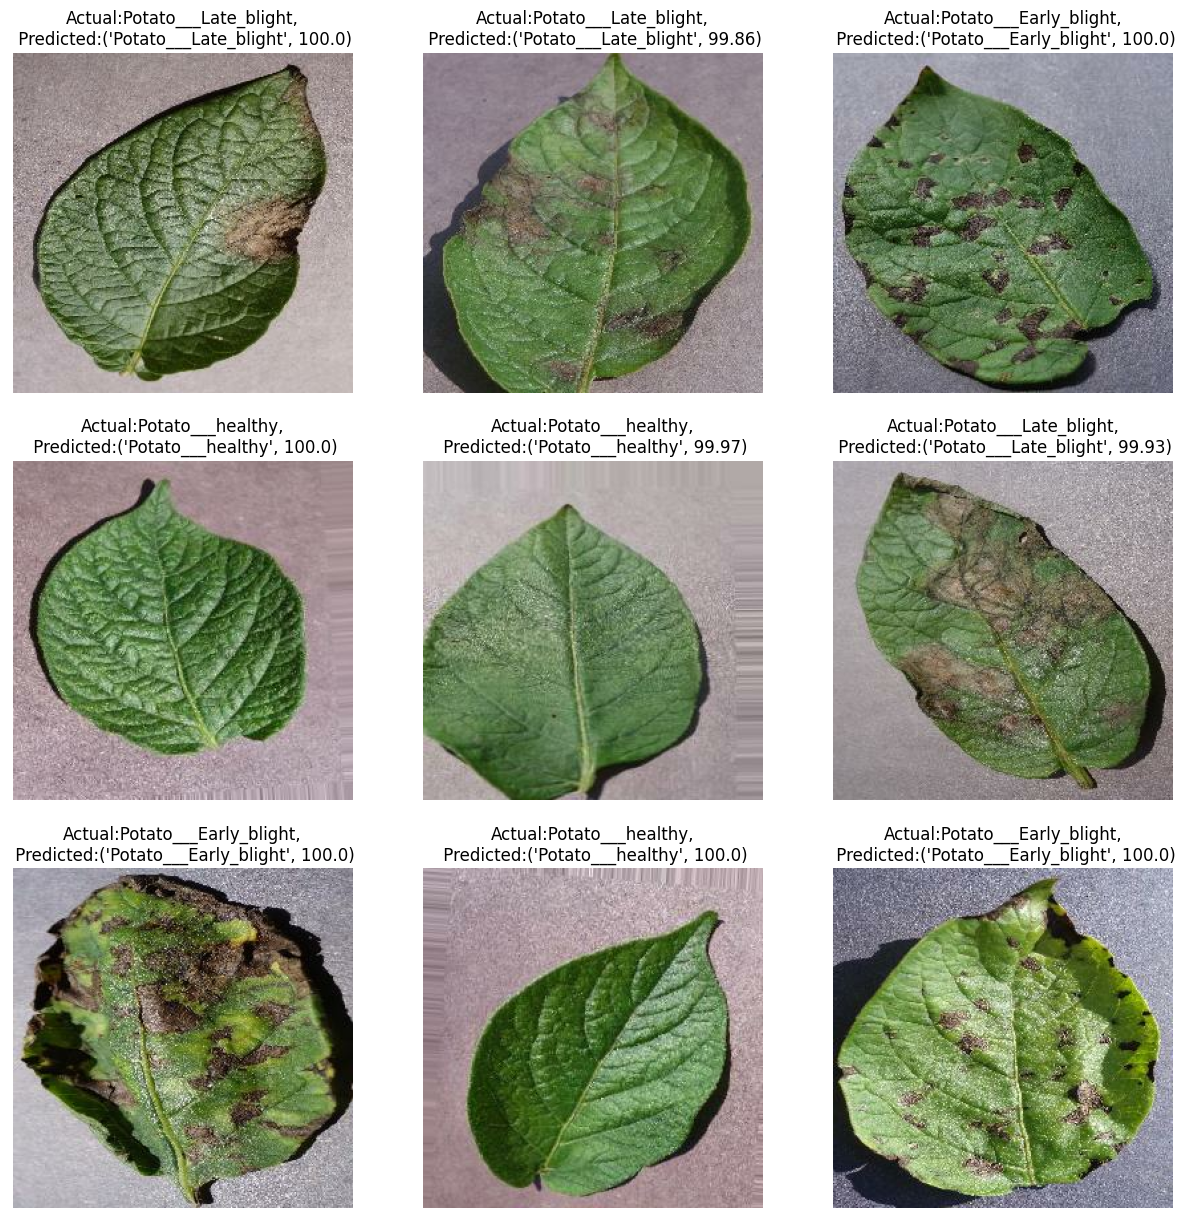

In [133]:
plt.figure(figsize=(15,15))
for images,labels in valid_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class=predict(model,images[i].numpy())
        actual_class=classnames[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class}")
        plt.axis("off")
    
        

In [176]:
model_version=1
tf.keras.Model.save(f"../models/{model_version}.keras")

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/nj/ppr56sb10x50fqmzswxx6xzh0000gn/T/ipykernel_18360/1348321030.py", line 2, in <module>
    tf.keras.Model.save(f"../models/{model_version}.keras")
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/utils/traceback_utils.py", line 119, in error_handler
    filtered_tb = _process_traceback_frames(e.__traceback__)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: Model.save() missing 1 required positional argument: 'filepath'

During handling of the above exception, anot

In [174]:
import tensorflow as tf

# Load the .h5 model
model = tf.keras.models.load_model(f"../models/modelkera.keras")

# Convert to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: /var/folders/nj/ppr56sb10x50fqmzswxx6xzh0000gn/T/tmpsirz03u9/assets


INFO:tensorflow:Assets written to: /var/folders/nj/ppr56sb10x50fqmzswxx6xzh0000gn/T/tmpsirz03u9/assets


Saved artifact at '/var/folders/nj/ppr56sb10x50fqmzswxx6xzh0000gn/T/tmpsirz03u9'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(32, 256, 256, 3), dtype=tf.float32, name='input_layer_6')
Output Type:
  TensorSpec(shape=(32, 3), dtype=tf.float32, name=None)
Captures:
  13151944336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13151943184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13151942416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13151943568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13151942608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13151941648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13151941456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13151941072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13151940688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13460521616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13460521424: 

W0000 00:00:1723657438.768447  933711 tf_tfl_flatbuffer_helpers.cc:392] Ignored output_format.
W0000 00:00:1723657438.769950  933711 tf_tfl_flatbuffer_helpers.cc:395] Ignored drop_control_dependency.
2024-08-14 23:13:58.771133: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/nj/ppr56sb10x50fqmzswxx6xzh0000gn/T/tmpsirz03u9
2024-08-14 23:13:58.771615: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2024-08-14 23:13:58.771621: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/nj/ppr56sb10x50fqmzswxx6xzh0000gn/T/tmpsirz03u9
2024-08-14 23:13:58.777965: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2024-08-14 23:13:58.836775: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /var/folders/nj/ppr56sb10x50fqmzswxx6xzh0000gn/T/tmpsirz03u9
2024-08-14 23:13:58.844066: I tensorflow/cc/saved_model/loader.cc: